### AcO_M1Pos_FEM_cl_seg1-6_mount

In [ ]:
import dos
from IPython.display import Image
path = './dos/AcO_M1Pos_FEM_cl_seg1-6_mount'

In [ ]:
# init
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png')

In [ ]:
sim.start()

In [ ]:
sim.pctComplete

In [ ]:
sim.join()
sim.terminate()

logs = sim.logs.entries

In [1]:
# Save
import pickle

"""
with open('./logs/AcO_M1Pos_FEM_cl_seg1-6_mount.sclogs', 'wb') as f:
    pickle.dump(sim.logs.entries, f)
    logs = sim.logs.entries
"""
# Load
'''
logs = pickle.load( open( './logs/AcO_M1Pos_FEM_cl_seg1-6_mount.sclogs', "rb" ) )
''';

# plot logs
---

In [2]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

try:
    duration = sim.cfg['simulation']['duration']
except NameError:
    duration = logs['FEM']['OSS_M1_lcl'].timeSeries[0][-1]
    
xticks = np.arange(0, duration + 1, duration/ 10)

logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7faae3064a90>},
 'AcO_controller': {'M1 TxyzRxyz': <dos.dos.Entry at 0x7faab42fc610>,
  'M2 Txyz': <dos.dos.Entry at 0x7faab42fca90>,
  'M2 Rxyz': <dos.dos.Entry at 0x7faab42fcf10>,
  'M1 BM': <dos.dos.Entry at 0x7faab43033d0>},
 'M1Pos0': {'M1Pos_DeltaF': <dos.dos.Entry at 0x7faab4303890>},
 'Mount': {'Mount_AzDrive_F': <dos.dos.Entry at 0x7faaa4af86d0>,
  'Mount_ElDrive_F': <dos.dos.Entry at 0x7faa9a78a4d0>,
  'Mount_GIRDrive_F': <dos.dos.Entry at 0x7faa8f331290>},
 'FEM': {'OSS_AzDrive_D': <dos.dos.Entry at 0x7faa868e70d0>,
  'OSS_ElDrive_D': <dos.dos.Entry at 0x7faa94410e90>,
  'OSS_GIRDrive_D': <dos.dos.Entry at 0x7faa7017dc90>,
  'OSS_M1_lcl': <dos.dos.Entry at 0x7faa676b4a90>,
  'OSS_Hardpoint_D': <dos.dos.Entry at 0x7faa58e2b890>,
  'OSS_M1_Translation': <dos.dos.Entry at 0x7faa51af3650>,
  'OSS_M1_Rotation': <dos.dos.Entry at 0x7faa78a7d590>}}

In [9]:
time_1 = logs['FEM']['OSS_M1_lcl'].timeSeries[0]
time_2000 = logs['wfs48']['M12_RBM'].timeSeries[0]
time_50000 = logs['AcO_controller']['M1 BM'].timeSeries[0]

AcO_ref = logs['AcO_controller']['M1 TxyzRxyz'].timeSeries[1]
FEM_out = logs['FEM']['OSS_M1_lcl'].timeSeries[1]

Mount_Az = logs['Mount']['Mount_AzDrive_F'].timeSeries[1]
Mount_El = logs['Mount']['Mount_ElDrive_F'].timeSeries[1]
Mount_GIR = logs['Mount']['Mount_GIRDrive_F'].timeSeries[1]

FEM_Az = logs['FEM']['OSS_AzDrive_D'].timeSeries[1]
FEM_El = logs['FEM']['OSS_ElDrive_D'].timeSeries[1]
FEM_GIR = logs['FEM']['OSS_GIRDrive_D'].timeSeries[1]

HP_F = logs['M1Pos0']['M1Pos_DeltaF'].timeSeries[1]

In [ ]:
seg = list(range(7))
TRxyz = list(range(6))
rbm_str = ['Tx','Ty','Tz','Rx','Ry','Rz']
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for rbm in TRxyz:
        ax[rbm].plot(time_1[::20000], AcO_ref[s,rbm,:], label = 'AcO')
        ax[rbm].plot(time_1, FEM_out[:,s * 6  + rbm], label = 'FEM')
        ax[rbm].set_xticks(xticks)
        ax[rbm].set_title(rbm_str[rbm])
        ax[rbm].legend(loc="best")
    plt.show()

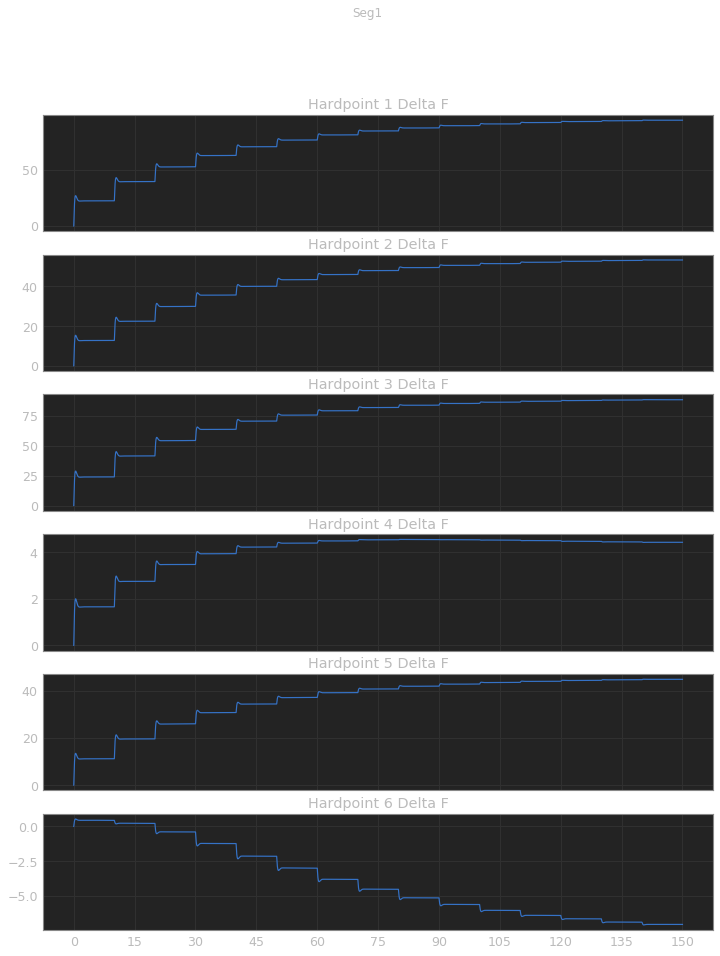

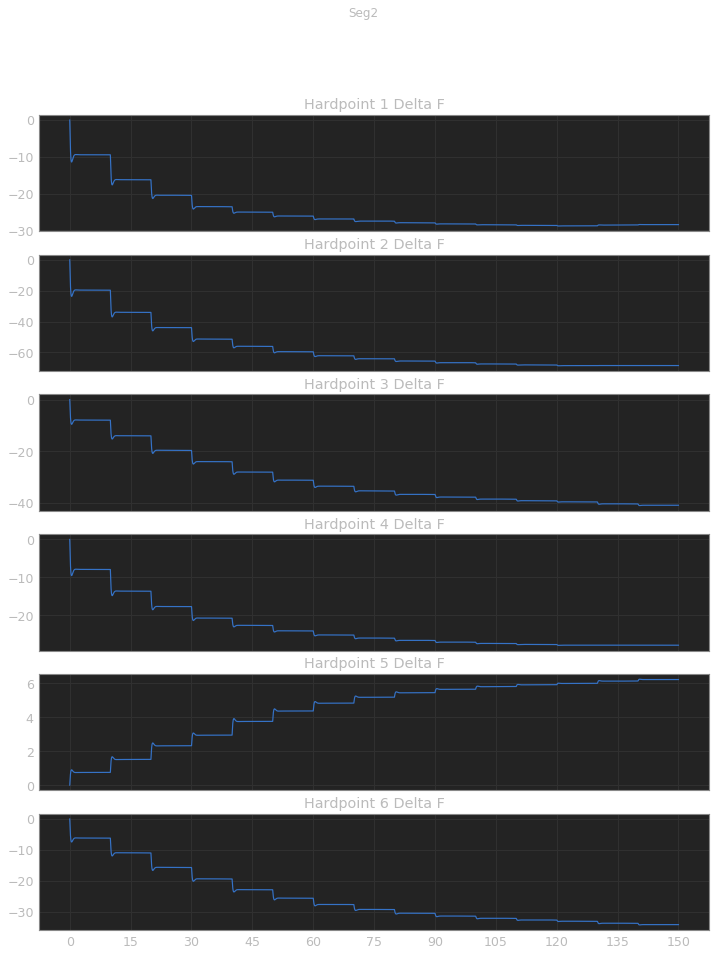

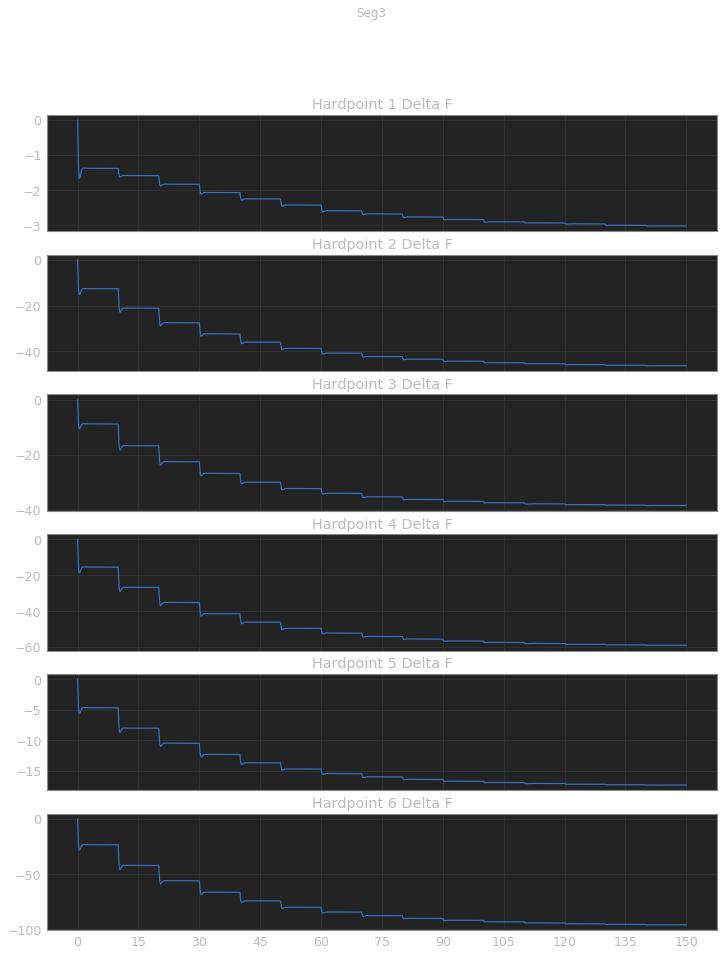

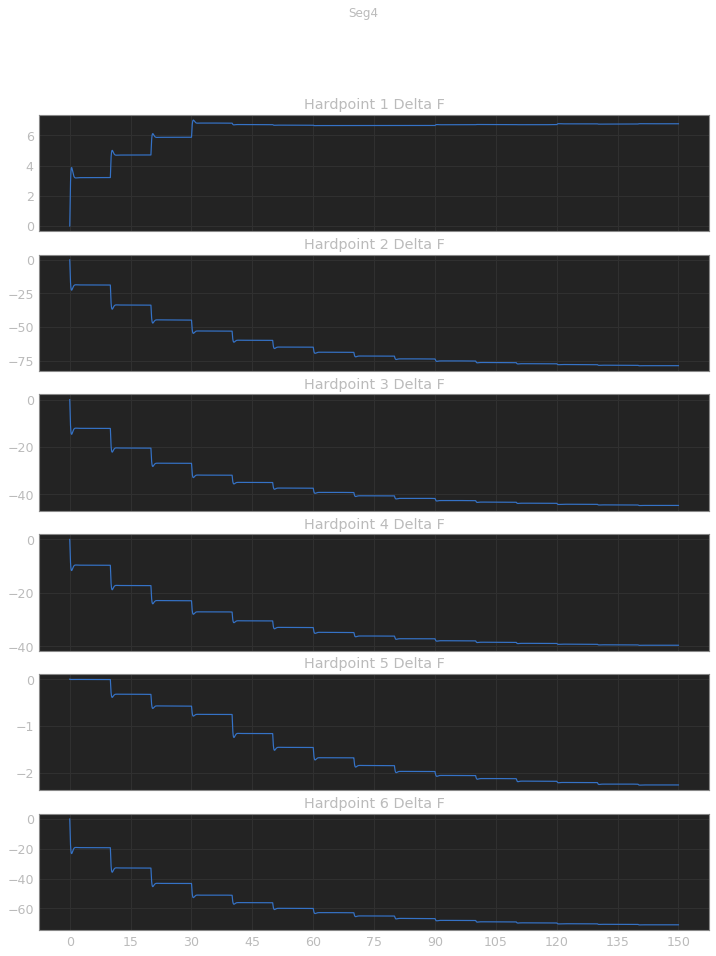

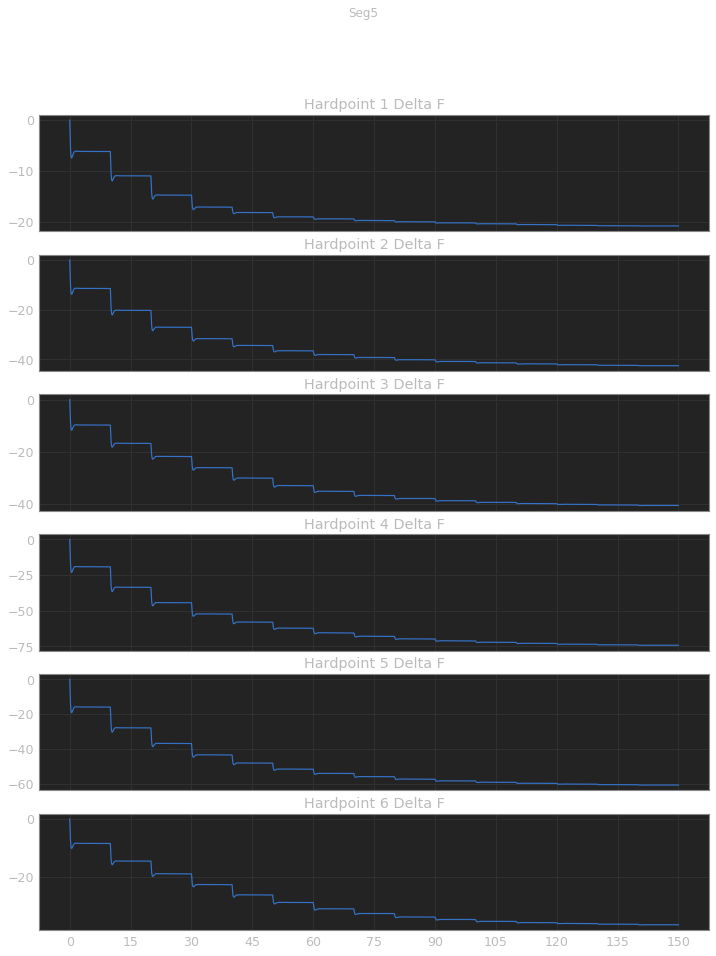

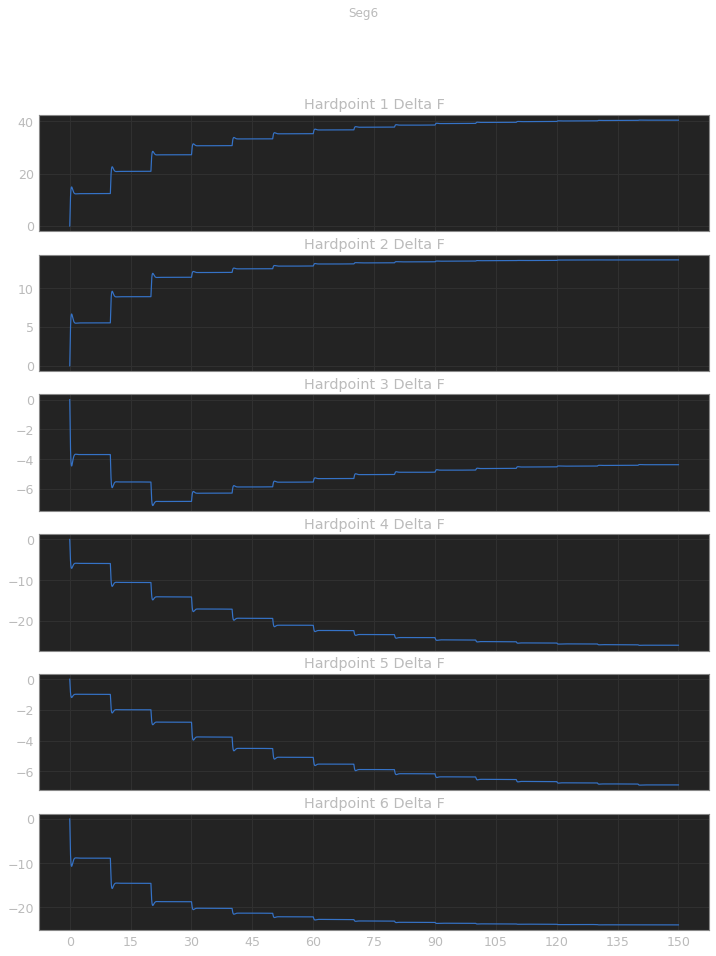

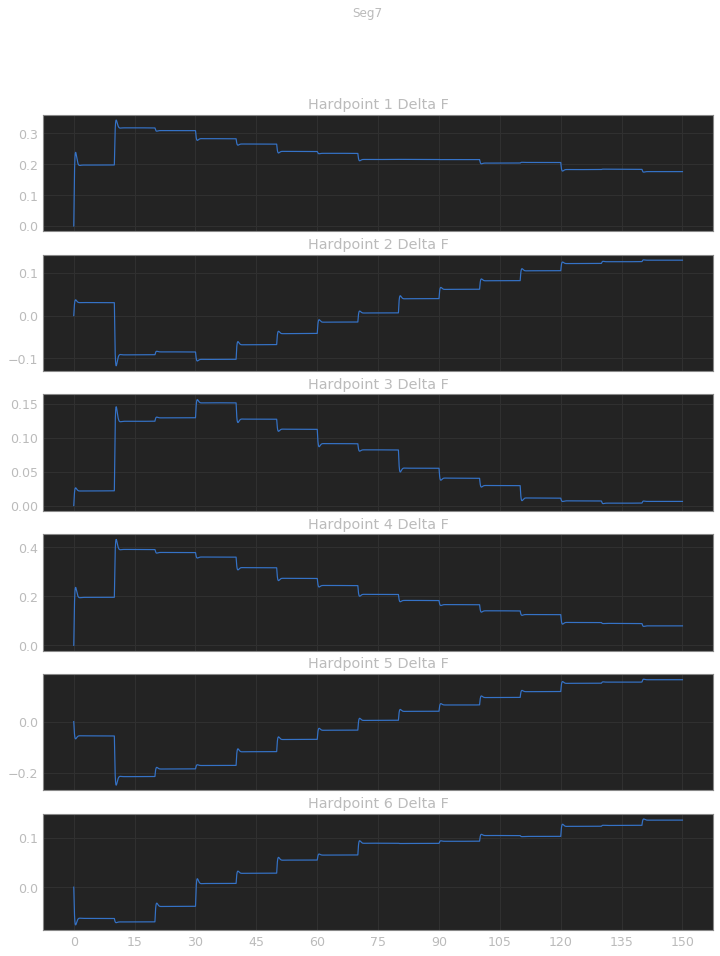

In [8]:
seg = list(range(7))
hp_ = list(range(6))
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for hp in hp_:
        ax[hp].plot(time_1, HP_F[:,s * 6  + hp])
        ax[hp].set_xticks(xticks)
        ax[hp].set_title(f'Hardpoint {hp + 1} Delta F')
        #ax[hp].legend(loc="best")
    plt.show()

In [ ]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(wfs)
plt.show()

In [ ]:
BM = logs['AcO_controller']['M1 BM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(BM[0,:,:].T)
plt.show()

In [ ]:
fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Mount Azimuth Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_Az[:,m])
plt.show()

fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Mount Elevation Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_El[:,m])
plt.show()

fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,6))
fig.suptitle('Mount GIR Forces', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(4):
    ax[m%2,m//2].plot(time_1,Mount_GIR[:,m])
plt.show()

In [ ]:
fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('FEM Azimuth', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,FEM_Az[:,m])
plt.show()

fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('FEM Elevation', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,FEM_El[:,m])
plt.show()

fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,6))
fig.suptitle('FEM GIR', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(4):
    ax[m%2,m//2].plot(time_1,FEM_GIR[:,m])
plt.show()